# 01. 回帰直線(線形近似)

01. <u>**実験データの回帰直線**</u>

    - `状況　:　大腸菌などの新たな殺菌装置として紫外線ランプの開発を行なっている`
    
        - **データ分析の目的**
            - *紫外線ランプに投入する電力量に応じて大腸菌の殺菌効率がどのように変化するかを調べる*
        
        - **保有している実験データ**
            - *紫外線ランプを10-180[w]まで変化させ、60[s]間紫外線を照射した時の大腸菌の生存率*


In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.style.use('ggplot')

In [3]:
df = pd.read_excel('./resources/linear_approximation.xlsx', header=6, index_col=0, sheet_name='Sheet1')
df.head()

,Number
Time[s],
0,98433.561371
10,94203.487920
20,91517.336375
30,86539.457397
40,81777.430583


In [4]:
watt_arr = np.array([0, 10, 20, 40, 60, 80])
df_all = pd.DataFrame()
for i in range(1, 6):
    df = pd.read_excel('./resources/linear_approximation.xlsx', header=6, index_col=0, sheet_name='Sheet'+str(i))
    df['W'] = watt_arr[i]
    df_all = pd.concat([df_all, df])

In [5]:
df_all

,Number,W
Time[s],,
0,98433.561371,10
10,94203.487920,10
20,91517.336375,10
30,86539.457397,10
40,81777.430583,10
50,76858.586685,10
60,73447.031317,10
0,99029.902000,20
10,91712.170320,20


In [6]:
# groupby で分析を行う
groups = df_all.groupby('W')
df_10W = groups.get_group(10)
df_10W

,Number,W
Time[s],,
0,98433.561371,10
10,94203.487920,10
20,91517.336375,10
30,86539.457397,10
40,81777.430583,10
50,76858.586685,10
60,73447.031317,10


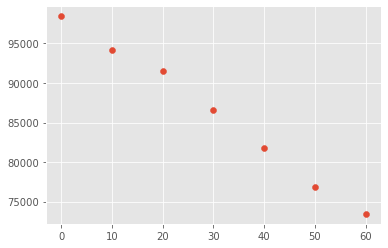

In [7]:
plt.scatter(df_10W.index, df_10W['Number'])

- **時間と共に大腸菌の数が減ってきている事がわかる**

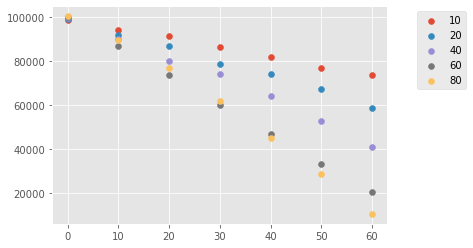

In [20]:
for name, group in groups:
    plt.scatter(group.index, group['Number'], label=name)
plt.legend(bbox_to_anchor=(1.25,1.0))

- **W(ワット)数が大きくなるにつれて傾きが急襲になるのが見て取れる**

### 線形近似

In [9]:
param = np.polyfit(df_10W.index, df_10W['Number'], 1)
param

array([ -426.39035152, 98902.69506669])

- 下記の式のように近似する
$$y=ax+b$$

- **-426.39035152　=　1秒あたり殺菌されている大腸菌の数**


In [10]:
# 傾きを受け取る list
p_list = []                                               # 傾きを受け取るからの list
p_list.append(0)                                          # 0W の時は傾き０であって欲しいので
for name, group in groups:                                 
    param = np.polyfit(group.index, group['Number'], 1)   # for文で W数あたりの傾きを取り出す
    print(name, -param[0])                                # name = W : param = 1秒あたりの大腸菌殺菌数 ※ 殺菌効力ということで -　を打ち消す為につける
    p_list.append(-param[0])                              # p_list に各W数の時の傾きを追加していく

10 426.3903515160256
20 649.8899826428569
40 947.7399997936386
60 1327.8571428571424
80 1508.104196494783


- **各種 W数　の時の傾き　=　大腸菌殺菌効力/s**
    - 10 426.3903515160256
    
    - 20 649.8899826428569
    
    - 40 947.7399997936386
    
    - 60 1327.8571428571424
    
    - 80 1508.104196494783

In [11]:
# 傾きが入っているか確認
p_list

[0,
 426.3903515160256,
 649.8899826428569,
 947.7399997936386,
 1327.8571428571424,
 1508.104196494783]

### 横軸 = W , 縦軸 = 殺菌効力/s
- **どのような振る舞いを見せるのか確認をする**

Text(0, 0.5, 'Efficiency')

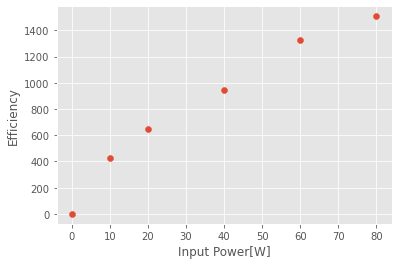

In [12]:
plt.scatter(watt_arr, p_list)
plt.xlabel('Input Power[W]')
plt.ylabel('Efficiency')

- **よく見ると段々と線形からずれてきている様子が窺える**
    - <u>効率が落ちて来ている...</u>


### 線形を引いて重ねて確認をする

In [13]:
# 線形近似 / polyfit : watt_arr の２０Wまでを使用する(そこまでは線形が保たれているので、そのままの直線を引く)
a = np.polyfit(watt_arr[:3], p_list[:3], 1)  # 線形の指定 / 1 = y=ax+b 
a

array([32.49449913, 33.81512006])

### 求めた値を直線として plot

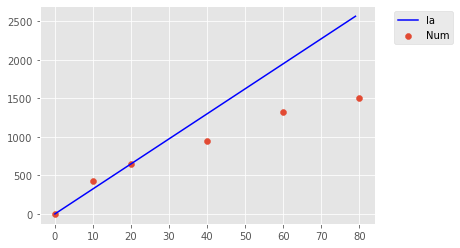

In [19]:
plt.scatter(watt_arr, p_list, label='Num')
x = np.arange(0, 80, 1)
plt.plot(x, a[0]* x, color='b', label='la')
plt.legend(bbox_to_anchor=(1.25,1.0))

- *20W付近までは線形が保たれて上手くいっているように見えたが...*
    - <u>線形近似をして確認してみると新たな事実が見えてきた</u>


- *紫外線ランプのような電力量を導入すると多くが熱量に散熱されてしまい **UV** にエネルギーが変換されない*
    
    - なので徐々に **殺菌効率が下がる**


- <u>今後のデバイスの開発の方針としては、低電力な用途で使うようにするか？変換効率を上げて殺菌効率を高めていくか？</u>

    - **分析によってとても具体的で生産的な改善策の糸口が見えてきた**